In [1]:
import pandas as pd
import numpy as np
import pickle
import scipy.stats
import sys
sys.path.insert(0, "/Users/lili/dropbox_lili/common_functions/outlier_analysis/")
import blackSheepCPTACmodule as blsh
import seaborn as sns

In [2]:
test_in = pd.read_csv('tests/sample_endo.csv',index_col=0)

In [3]:
test_in = test_in.dropna(thresh=100, axis=1)

In [4]:
test_in.to_csv('tests/sample_endo.csv')

In [5]:
outliers_table = blsh.make_outliers_table(test_in)

In [6]:
outliers_table.to_csv('tests/sample_endo_outliers_table.csv')

# Making test data by hand

In [13]:
iqrs = 1.5
ind_sep = '-'

np.random.seed(4)
samples = ['s%s'%i for i in range(0, 18)]
sites = [
    'geneA-site1', 
    'geneB-site1', 
    'geneC-site1', 
    'geneC-site2', 
    'geneC-site3', 
    'geneD-site1', 
    'geneD-site2',
    'geneE-site1', 
    'geneE-site2', 
    'geneE-site3', 
    'geneF-site1', 
    'geneF-site2',
    'geneG-site1', 
    'geneG-site2', 
    'geneH-site1', 
    'geneH-site2',
    'geneH-site3', 
    'geneH-site4', 
    'geneH-site5',
    'geneH-site6'
]
comparisons = ['comp%s'%i for i in range(0, 5)]
annotations = pd.DataFrame(np.random.randint(0,2,size=(len(samples), 5)), columns=comparisons, index=samples)
annotations = annotations.mask(np.random.random(annotations.shape) < .02)

annotations.loc[:, 'comp0'] = 0
annotations.loc[['s9', 's10', 's11', 's14', 's15'], 'comp0'] = 1
annotations.loc[:, 'comp2'] = 1
annotations.loc[['s1', 's3', 's4', 's13'], 'comp2'] = 0

df = pd.DataFrame(np.random.normal(0, 1, size=(18, 20)), index=samples, columns=sites)
df = df.mask(np.random.random(df.shape) < .25)
df[np.random.random(df.shape) < .15] = 3
df[np.random.random(df.shape) < .15] = -3
addcol = pd.Series([0, -0.1, 0.04, 0.15, -0.02, 
           0, 0.3, -0.5, -0.05, 4, 
           4, 10, 0.7, -0.25, 3, 
           -0.15, 0.15, -0.02], index=samples, name='geneI-site1')
df = pd.concat([df, addcol], axis=1)
# df.median().subtract(iqrs*scipy.stats.iqr(df, nan_policy="omit", axis=0))

outliers = blsh.make_outliers_table(df, aggregate=True)

qvalues = blsh.compare_groups_outliers(outliers, annotations)

qvalues

Testing 1 rows for enrichment in comp0 0 samples
Testing 3 rows for enrichment in comp0 1 samples
Testing 2 rows for enrichment in comp1 0.0 samples
Testing 2 rows for enrichment in comp1 1.0 samples
Testing 1 rows for enrichment in comp2 1 samples
Testing 2 rows for enrichment in comp2 0 samples
No rows had outliers in at least 0.3 of comp3 1 samples
Testing 2 rows for enrichment in comp3 0 samples
No rows had outliers in at least 0.3 of comp4 1 samples
Testing 2 rows for enrichment in comp4 0 samples


,comp0_0_enrichment_FDR,comp0_1_enrichment_FDR,comp1_0.0_enrichment_FDR,comp1_1.0_enrichment_FDR,comp2_1_enrichment_FDR,comp2_0_enrichment_FDR,comp3_0_enrichment_FDR,comp4_0_enrichment_FDR
geneA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
geneB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
geneC,NaN,0.296653,NaN,NaN,NaN,NaN,NaN,NaN
geneD,0.287356,NaN,NaN,0.329502,NaN,0.005109,0.597701,NaN
geneE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
geneF,NaN,NaN,NaN,0.195556,NaN,0.099891,NaN,NaN
geneG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
geneH,NaN,0.003036,0.439416,NaN,1.0,NaN,0.597701,1.0
geneI,NaN,0.003036,0.164706,NaN,NaN,NaN,NaN,1.0


In [14]:
fractable = blsh.makeFracTable(outliers.transpose(), df.index).transpose()

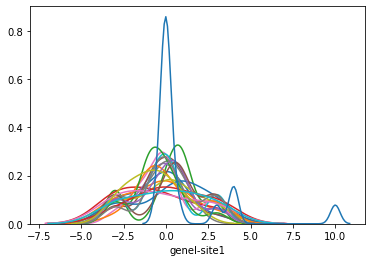

In [15]:
for col in df.columns:
    sns.distplot(df[col].dropna(), hist=False)

In [16]:
qvalues.columns = ['fisherFDR_'+col.replace('_enrichment_FDR', '') for col in qvalues.columns]

In [17]:
qvalues = qvalues.dropna(how='all')

In [18]:
with open('tests/pidgin_example.pickle', 'wb') as fh:
    pickle.dump([df, annotations, outliers, fractable, qvalues], fh)

In [20]:
df.to_csv('tests/pidgin_values.csv')
annotations.to_csv('tests/pidgin_annotations.csv')
outliers.to_csv('tests/pidgin_outliers.csv')
fractable.to_csv('tests/pidgin_fracTable.csv')
qvalues.to_csv('tests/pidgin_qvalues.csv')

In [21]:
 with open("tests/pidgin_example.pickle", "rb") as fh:
        df, annotations, outliers, fractable, qvalues = pickle.load(fh)

In [22]:
df = df.transpose()
outliers = outliers.transpose()
fractable = fractable.transpose()

## Doing a transpose for inputs

In [23]:
with open('tests/pidgin_example.pickle', 'wb') as fh:
    pickle.dump([df, annotations, outliers, fractable, qvalues], fh)

In [24]:
df.to_csv('tests/pidgin_values.csv')
annotations.to_csv('tests/pidgin_annotations.csv')
outliers.to_csv('tests/pidgin_outliers.csv')
fractable.to_csv('tests/pidgin_fracTable.csv')
qvalues.to_csv('tests/pidgin_qvalues.csv')

# Endo data

In [23]:
sys.path.insert(0, ".")

In [24]:
import blacksheep

In [25]:
import importlib
importlib.reload(blacksheep)

<module 'blacksheep' from './blacksheep/__init__.py'>

In [26]:
annot = pd.read_csv('/Users/lili/dropbox_lili/cptac/endometrial/data/UCEC_CPTAC3_meta_table_V2.1.txt', 
                    sep='\t', encoding="cp1252", index_col=0)

In [27]:
df = pd.read_csv('tests/sample_endo.csv', index_col=0)

In [28]:
subset = annot.loc[df.index, ['Histologic_type', 'MSI_status', 'POLE_subtype']]

In [29]:
subset = blacksheep.binarizeAnnotations(subset)

In [30]:
subset.to_csv('tests/sample_annotations.csv')

## Swapping axes for endo

In [27]:
outs = pd.read_csv('tests/sample_endo_outliers_table.csv', index_col=0)
outs = outs.transpose()
df = pd.read_csv('tests/sample_endo.csv', index_col=0)
df = df.transpose()
frac = pd.read_csv('tests/sample_endo.up.fraction_table.tsv', index_col=0, sep='\t')
frac = frac.transpose()

In [36]:
outs.to_csv('tests/sample_endo_outliers_table.csv')
df.to_csv('tests/sample_endo.csv')
frac.to_csv('tests/sample_endo.up.fraction_table.tsv', sep='\t')